In [3]:
#importing required library files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

1.  Use Pandas to import the data from epa-sea-level.csv.

In [4]:
#impoting data
df = pd.read_csv('epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [5]:
#finding the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      144 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   31 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.8 KB


In [6]:
#showing the shape of the dataset
df.shape

(144, 5)

In [9]:
#Removing null values from selected two columns
df_clean = df.dropna(subset=['Year', 'CSIRO Adjusted Sea Level'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 6.3 KB


2.  Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.

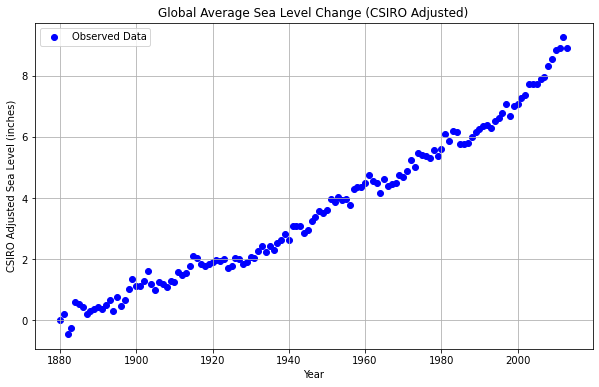

In [19]:
#scatter plot of the data
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Year'], df_clean['CSIRO Adjusted Sea Level'], color='blue', label='Observed Data')

#adding labels, title, and grid
plt.title('Global Average Sea Level Change (CSIRO Adjusted)')
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level (inches)')
plt.grid(True)
plt.legend()

#showing the plot
plt.show()

3. Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

Slope: 0.0628765374624721, Intercept: -118.74277636667209


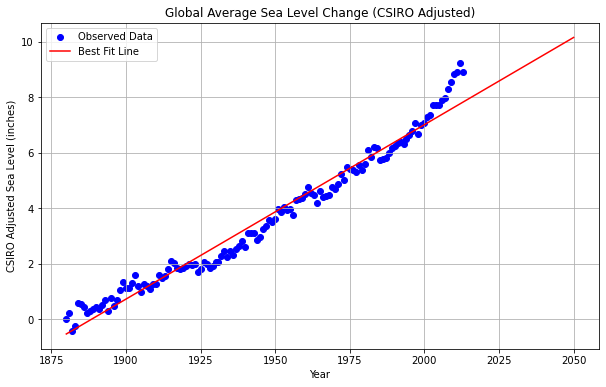

Predicted sea level in 2050: 10.15 inches


In [17]:
#scatter plot of the data
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Year'], df_clean['CSIRO Adjusted Sea Level'], color='blue', label='Observed Data')

#performing linear regression on the entire dataset
slope, intercept, r_value, p_value, std_err = linregress(df_clean['Year'], df_clean['CSIRO Adjusted Sea Level'])

#debugging, Check slope and intercept
print(f"Slope: {slope}, Intercept: {intercept}")

#generating years from 1880 to 2050 for prediction
years_extended = pd.Series(range(1880, 2051))

#calculating the best fit line
sea_level_fit = intercept + slope * years_extended

#plotting the line of best fit
plt.plot(years_extended, sea_level_fit, 'r', label='Best Fit Line')

#adding labels, title, and grid
plt.title('Global Average Sea Level Change (CSIRO Adjusted)')
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level (inches)')
plt.grid(True)
plt.legend()

#showing the plot
plt.show()

#predicting sea level in 2050
sea_level_2050 = intercept + slope * 2050
print(f"Predicted sea level in 2050: {sea_level_2050:.2f} inches")


4. Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

5. The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.

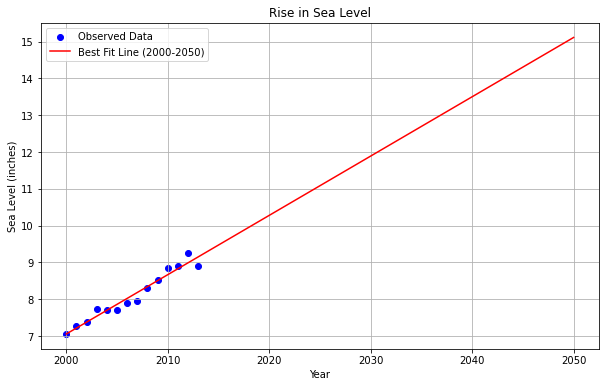

Predicted sea level in 2050 (based on data from 2000 onwards): 15.11 inches


In [16]:
#filtering the data to include only from the year 2000 onward
recent_data = df_clean[df_clean['Year'] >= 2000]

#scattering plot of the recent data
plt.figure(figsize=(10, 6))
plt.scatter(recent_data['Year'], recent_data['CSIRO Adjusted Sea Level'], color='blue', label='Observed Data')

#performing linear regression on the data from 2000 onwards
slope_recent, intercept_recent, r_value, p_value, std_err = linregress(recent_data['Year'], recent_data['CSIRO Adjusted Sea Level'])

#generating years from 2000 to 2050 for prediction
years_recent = pd.Series(range(2000, 2051))

#calculating the best fit line for the recent data
sea_level_fit_recent = intercept_recent + slope_recent * years_recent

#ploting the line of best fit
plt.plot(years_recent, sea_level_fit_recent, 'r', label='Best Fit Line (2000-2050)')

#adding labels, title, and a grid
plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.grid(True)
plt.legend()

#showing the plot
plt.show()

#predicting sea level in 2050 using the linear regression for data from 2000 onwards
sea_level_2050_recent = intercept_recent + slope_recent * 2050
print(f"Predicted sea level in 2050 (based on data from 2000 onwards): {sea_level_2050_recent:.2f} inches")

